In [ ]:
#The aim is to classify vehicles from the dataset based on the features extracted

In [73]:
# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm 
#2.Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
#Load the data
vehicles_df =pd.read_csv('vehicle-1.csv')


In [75]:
#Check datatypes of all variables
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [76]:
vehicles_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [77]:
#shape of the data
vehicles_df.shape

(846, 19)

In [78]:
#Entries of class: take the unique entries of target variable
pd.DataFrame(vehicles_df['class'].unique())

,0
0,van
1,car
2,bus


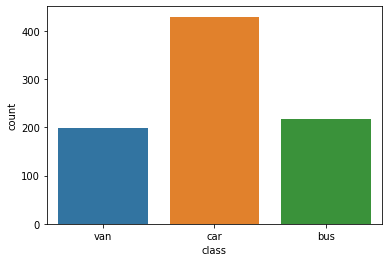

In [79]:
#Countplot and count of each class in target variable
sns.countplot(vehicles_df['class'])

In [80]:
pd.value_counts(vehicles_df['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

In [81]:
#5 point summary
vehicles_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [82]:
#check for null values
vehicles_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [83]:
#Replace null values with mean value of that column using SimpleImputer
from sklearn.impute import SimpleImputer 
  
# Imputer object using the mean strategy and  
# missing_values type for imputation 
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean') 
impute_cols= ['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2']
imputer =imputer.fit(vehicles_df[impute_cols])
vehicles_df[impute_cols]= imputer.transform(vehicles_df[impute_cols])
vehicles_df[impute_cols]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
0,48.0,83.0,178.0,72.0,162.0,42.0,20.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0
1,41.0,84.0,141.0,57.0,149.0,45.0,19.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0
2,50.0,106.0,209.0,66.0,207.0,32.0,23.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0
3,41.0,82.0,159.0,63.0,144.0,46.0,19.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0
4,44.0,70.0,205.0,103.0,149.0,45.0,19.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,39.0,87.0,183.0,64.0,169.0,40.0,20.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0
842,46.0,84.0,163.0,66.0,159.0,43.0,20.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0
843,54.0,101.0,222.0,67.0,222.0,30.0,25.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0
844,36.0,78.0,146.0,58.0,135.0,50.0,18.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0


In [84]:
#check for null values after replacement
vehicles_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [85]:
#plot pairplot of dataset to check for correlation between variables
vehicles_target_df= vehicles_df.drop('class',axis=1)

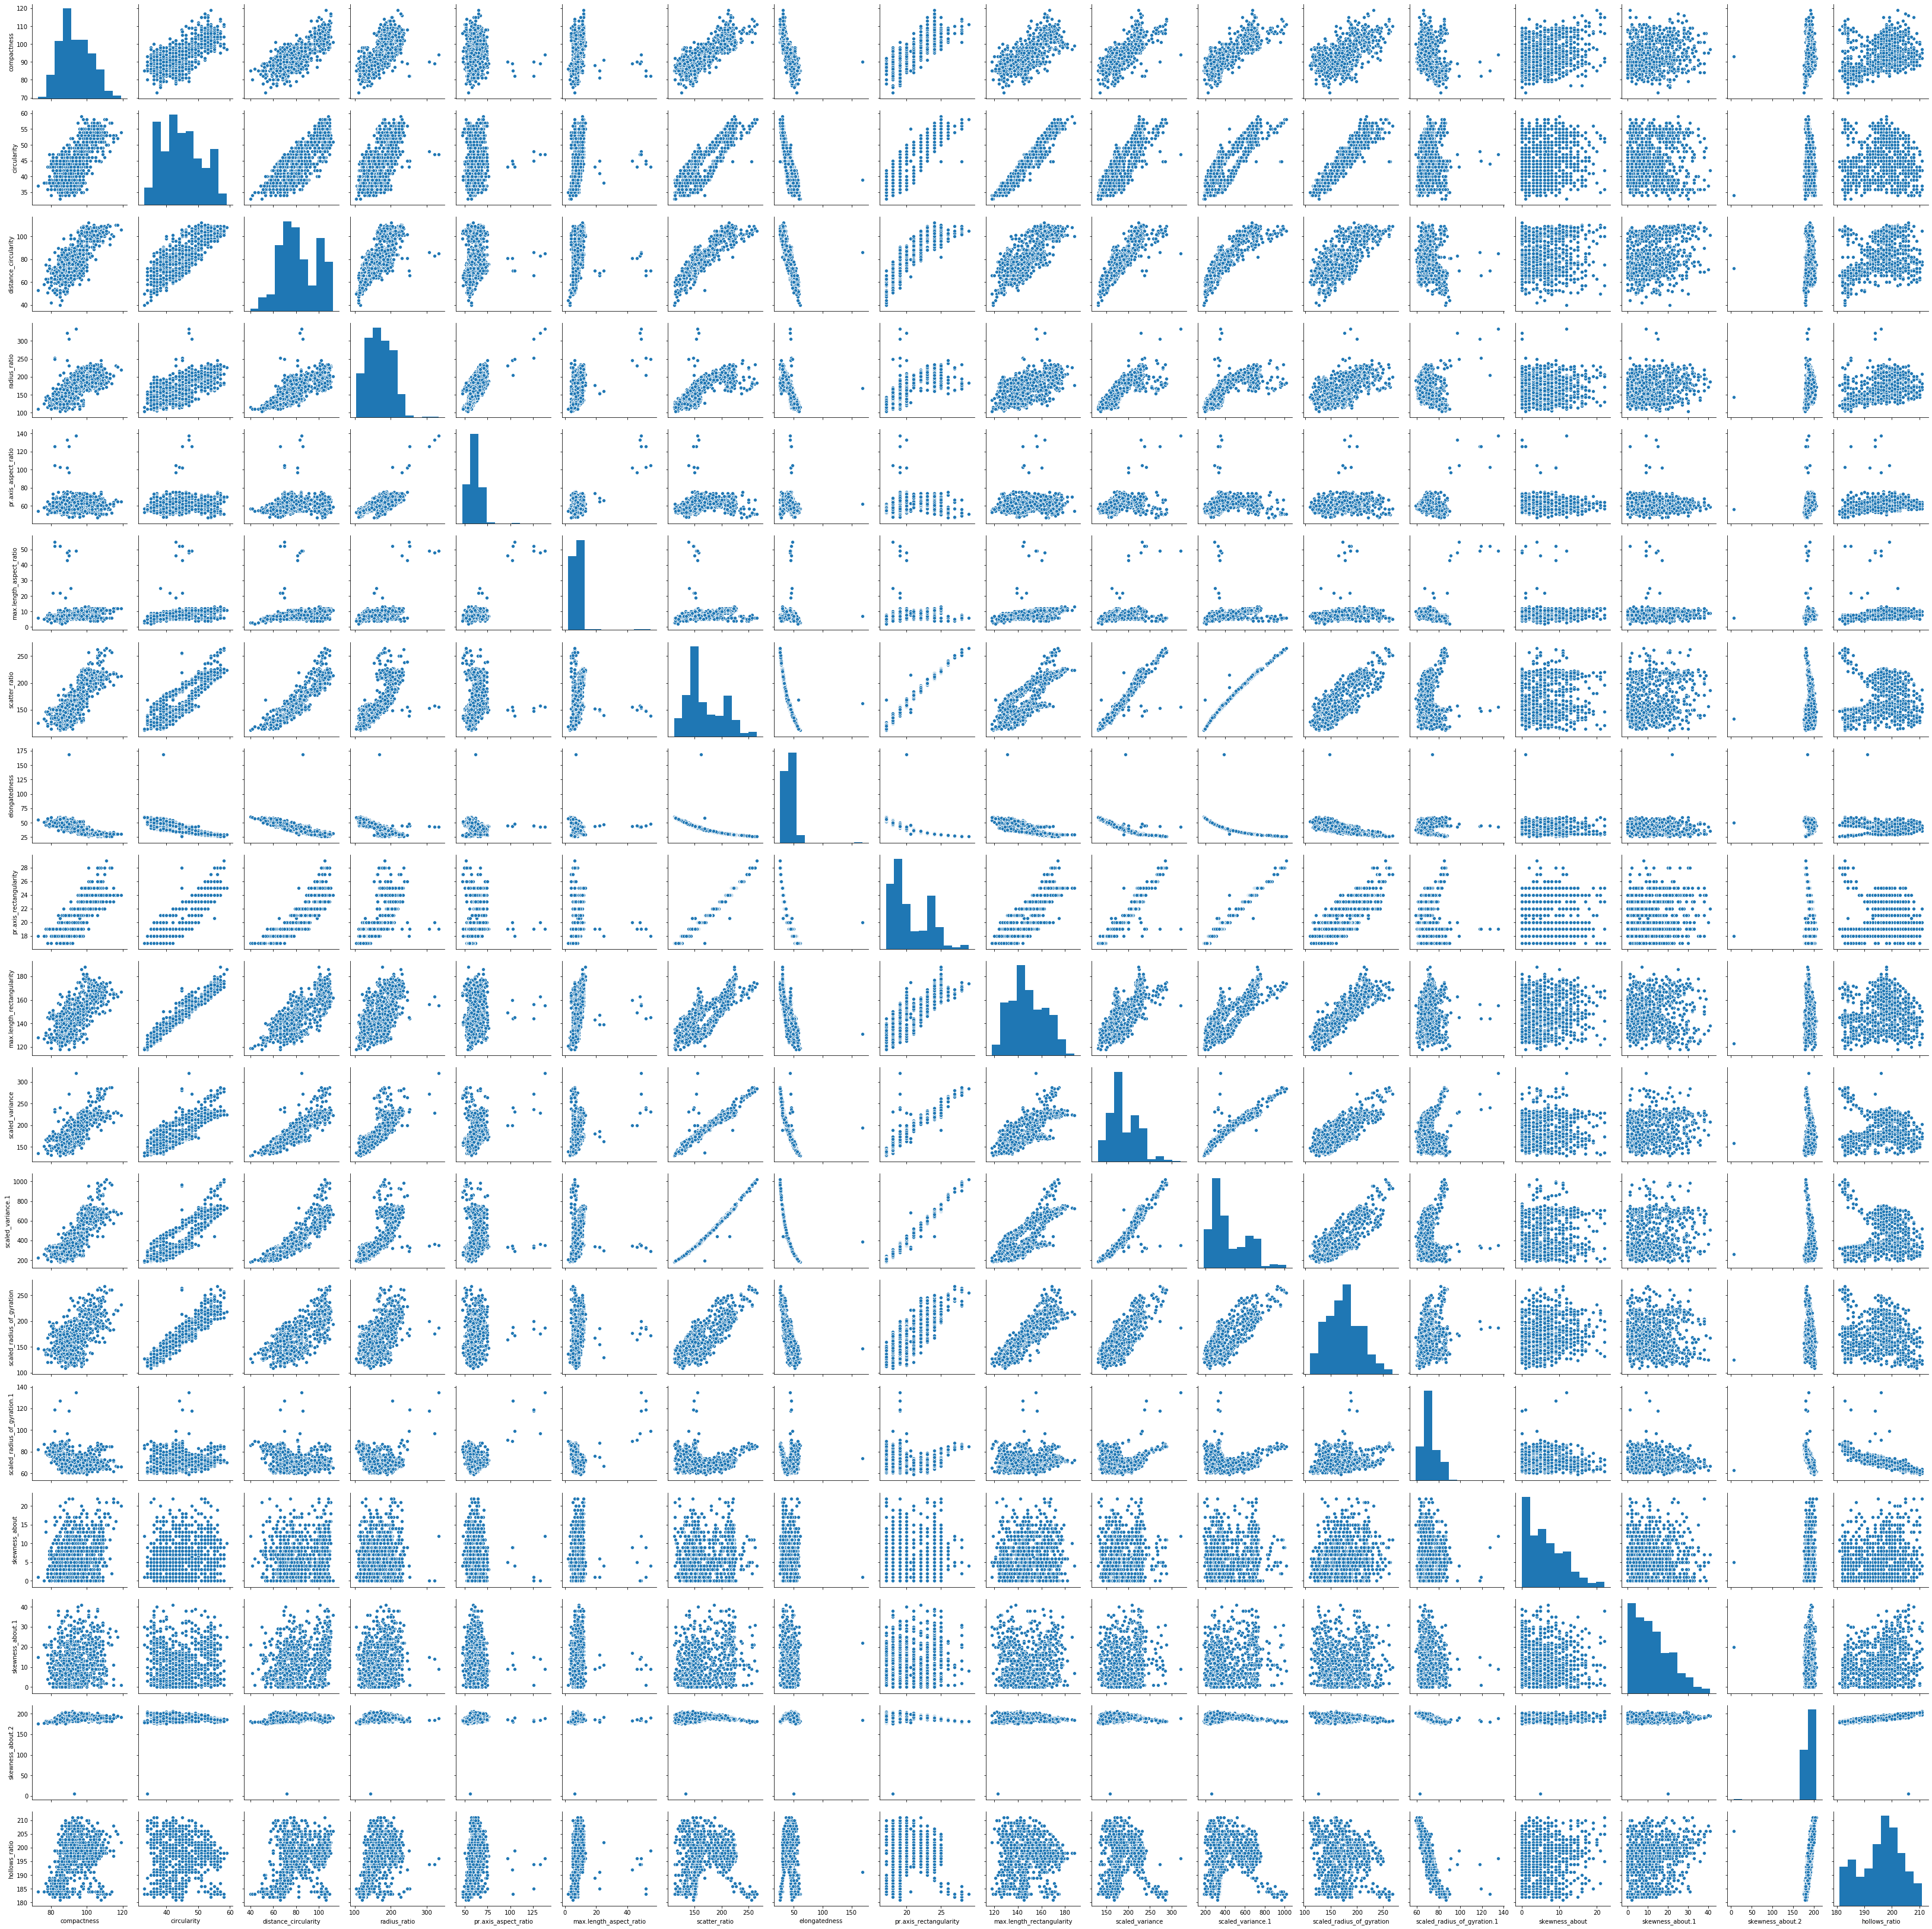

In [28]:
sns.pairplot(vehicles_target_df)

In [86]:
#Correlation matrix and heatmap
vehicles_df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,0.091704,0.148249,0.812235,-0.788643,0.813636,0.676143,0.762770,0.815901,0.585156,-0.250071,0.235687,0.157387,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.620967,0.153362,0.251208,0.848207,-0.821901,0.844972,0.961943,0.796822,0.838525,0.926888,0.052642,0.144394,-0.011851,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.767079,0.158397,0.264550,0.904400,-0.911435,0.893128,0.774669,0.861980,0.887328,0.705953,-0.225852,0.113813,0.265553,0.145563,0.332095
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,0.450036,0.734228,-0.789795,0.708285,0.569205,0.794041,0.720150,0.536536,-0.180819,0.048720,0.173832,0.382129,0.471262
pr.axis_aspect_ratio,0.091704,0.153362,0.158397,0.663559,1.000000,0.648704,0.103715,-0.183264,0.079395,0.127128,0.273414,0.089620,0.122111,0.152776,-0.058481,-0.032134,0.239849,0.267724
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450036,0.648704,1.000000,0.165967,-0.180041,0.161592,0.305943,0.318955,0.143713,0.189704,0.295574,0.015439,0.043489,-0.026180,0.143919
scatter_ratio,0.812235,0.848207,0.904400,0.734228,0.103715,0.165967,1.000000,-0.970723,0.989370,0.808356,0.948296,0.993784,0.799266,-0.027985,0.074308,0.213127,0.005167,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183264,-0.180041,-0.970723,1.000000,-0.949077,-0.775519,-0.936715,-0.955074,-0.766029,0.103481,-0.051997,-0.185691,-0.114727,-0.216719
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,0.079395,0.161592,0.989370,-0.949077,1.000000,0.811447,0.934568,0.989490,0.797068,-0.015676,0.082974,0.214734,-0.018990,0.099191
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,0.127128,0.305943,0.808356,-0.775519,0.811447,1.000000,0.745209,0.796018,0.866425,0.041220,0.135745,0.001658,-0.104254,0.076770


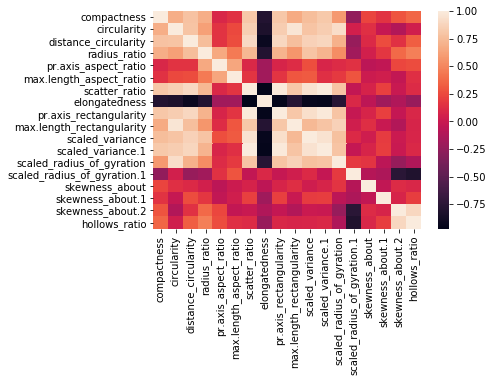

In [87]:
sns.heatmap(vehicles_df.corr())

In [21]:

vehicles_corr_df = vehicles_df.corr()
vehicles_corr_df = vehicles_corr_df[vehicles_corr_df>0.5]
vehicles_corr_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,NaN,NaN,0.812235,NaN,0.813636,0.676143,0.762770,0.815901,0.585156,NaN,NaN,NaN,NaN,NaN
circularity,0.685421,1.000000,0.793016,0.620967,NaN,NaN,0.848207,NaN,0.844972,0.961943,0.796822,0.838525,0.926888,NaN,NaN,NaN,NaN,NaN
distance_circularity,0.789909,0.793016,1.000000,0.767079,NaN,NaN,0.904400,NaN,0.893128,0.774669,0.861980,0.887328,0.705953,NaN,NaN,NaN,NaN,NaN
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,NaN,0.734228,NaN,0.708285,0.569205,0.794041,0.720150,0.536536,NaN,NaN,NaN,NaN,NaN
pr.axis_aspect_ratio,NaN,NaN,NaN,0.663559,1.000000,0.648704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max.length_aspect_ratio,NaN,NaN,NaN,NaN,0.648704,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scatter_ratio,0.812235,0.848207,0.904400,0.734228,NaN,NaN,1.000000,NaN,0.989370,0.808356,0.948296,0.993784,0.799266,NaN,NaN,NaN,NaN,NaN
elongatedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,NaN,NaN,0.989370,NaN,1.000000,0.811447,0.934568,0.989490,0.797068,NaN,NaN,NaN,NaN,NaN
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,NaN,NaN,0.808356,NaN,0.811447,1.000000,0.745209,0.796018,0.866425,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Correlation matrix and heatmap tells us the correlation between the variables having continous,Since our target is not continous, it is not reflected in above two matrix.

In [88]:
#To find the correlation between each variable with target class( having categorical values),we use Chi-square test 
from sklearn.feature_selection import chi2
chi_scores = chi2(vehicles_target_df,vehicles_df['class'])
chi_scores

(array([5.95063655e+01, 4.77458053e+01, 5.01533755e+02, 9.05747825e+02,
        1.43720448e+01, 9.52613018e+01, 1.25717687e+03, 3.26346269e+02,
        5.64562800e+01, 2.44258181e+01, 8.49752314e+02, 1.26874548e+04,
        4.54183797e+02, 1.01906419e+02, 1.20231661e+02, 4.55554333e+02,
        2.11168268e+00, 2.92779241e+01]),
 array([1.19772444e-013, 4.28676941e-011, 1.23973522e-109, 2.08621329e-197,
        7.57094551e-004, 2.06191681e-021, 1.01744686e-273, 1.36398045e-071,
        5.50395098e-013, 4.96593454e-006, 3.01043660e-185, 0.00000000e+000,
        2.37269382e-099, 7.43536613e-023, 7.79877704e-027, 1.19573105e-099,
        3.47899601e-001, 4.38914120e-007]))

In [89]:
#Separate out chi-values and p-values from the result above,second array being the array of p-values
p_values = pd.Series(chi_scores[1],index = vehicles_target_df.columns)
p_values.sort_values(ascending = False , inplace = True)

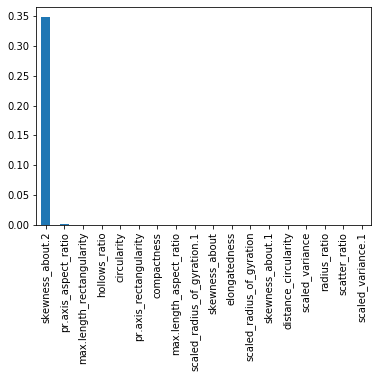

In [90]:
p_values.plot.bar()

In [92]:
p_values

skewness_about.2                3.478996e-01
pr.axis_aspect_ratio            7.570946e-04
max.length_rectangularity       4.965935e-06
hollows_ratio                   4.389141e-07
circularity                     4.286769e-11
pr.axis_rectangularity          5.503951e-13
compactness                     1.197724e-13
max.length_aspect_ratio         2.061917e-21
scaled_radius_of_gyration.1     7.435366e-23
skewness_about                  7.798777e-27
elongatedness                   1.363980e-71
scaled_radius_of_gyration       2.372694e-99
skewness_about.1                1.195731e-99
distance_circularity           1.239735e-109
scaled_variance                3.010437e-185
radius_ratio                   2.086213e-197
scatter_ratio                  1.017447e-273
scaled_variance.1               0.000000e+00
dtype: float64

In [93]:
#Since 'skewness_about.2' has the highest variance,it is highly independent of the target class, so we can drop this column,

In [94]:
vehicles_df.drop('skewness_about.2',axis=1, inplace=True)

In [95]:
vehicles_corr_df = vehicles_df.corr()
vehicles_corr_df = vehicles_corr_df[vehicles_corr_df>0.5]
vehicles_corr_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,NaN,NaN,0.812235,NaN,0.813636,0.676143,0.762770,0.815901,0.585156,NaN,NaN,NaN,NaN
circularity,0.685421,1.000000,0.793016,0.620967,NaN,NaN,0.848207,NaN,0.844972,0.961943,0.796822,0.838525,0.926888,NaN,NaN,NaN,NaN
distance_circularity,0.789909,0.793016,1.000000,0.767079,NaN,NaN,0.904400,NaN,0.893128,0.774669,0.861980,0.887328,0.705953,NaN,NaN,NaN,NaN
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,NaN,0.734228,NaN,0.708285,0.569205,0.794041,0.720150,0.536536,NaN,NaN,NaN,NaN
pr.axis_aspect_ratio,NaN,NaN,NaN,0.663559,1.000000,0.648704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max.length_aspect_ratio,NaN,NaN,NaN,NaN,0.648704,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scatter_ratio,0.812235,0.848207,0.904400,0.734228,NaN,NaN,1.000000,NaN,0.989370,0.808356,0.948296,0.993784,0.799266,NaN,NaN,NaN,NaN
elongatedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,NaN,NaN,0.989370,NaN,1.000000,0.811447,0.934568,0.989490,0.797068,NaN,NaN,NaN,NaN
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,NaN,NaN,0.808356,NaN,0.811447,1.000000,0.745209,0.796018,0.866425,NaN,NaN,NaN,NaN


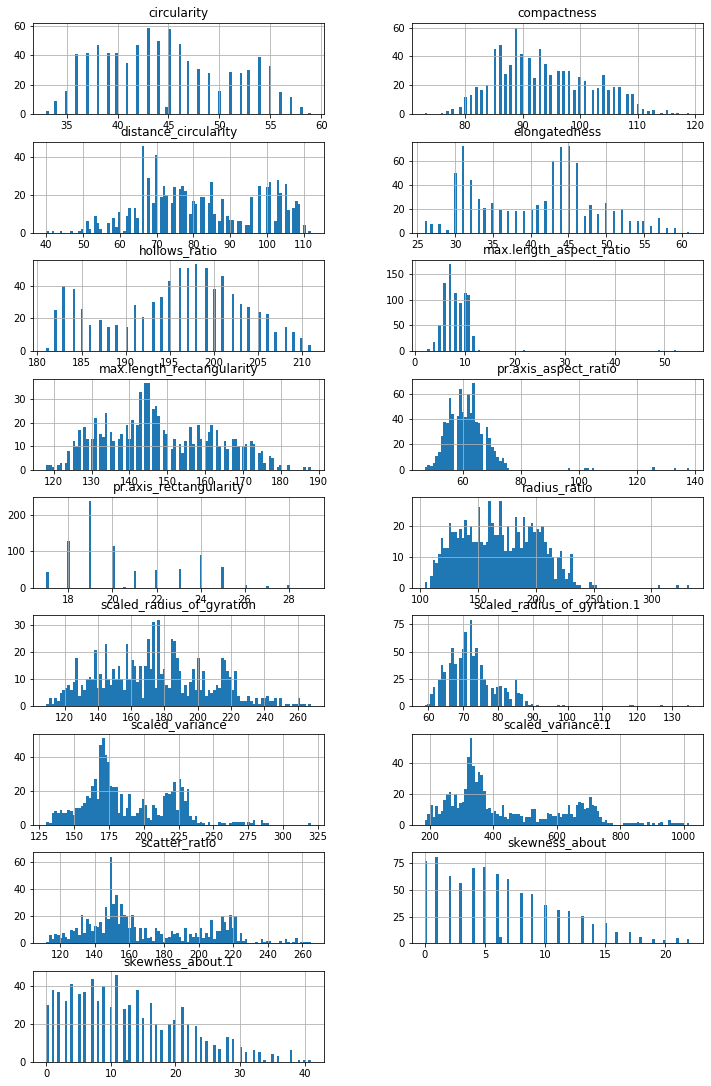

In [96]:
vehicles_df.hist(stacked=False , bins=100,figsize=(12,30), layout=(14,2));

In [35]:
#Find the skewness values to check for normal distribution of dataset.
vehicles_df.skew()

compactness                  0.381271
circularity                  0.262584
distance_circularity         0.106837
radius_ratio                 0.396381
pr.axis_aspect_ratio         3.834882
max.length_aspect_ratio      6.778394
scatter_ratio                0.607629
elongatedness                0.047875
pr.axis_rectangularity       0.772254
max.length_rectangularity    0.256359
scaled_variance              0.652753
scaled_variance.1            0.843027
scaled_radius_of_gyration    0.279647
dtype: float64

In [ ]:
#Most of the variables are moderately skewed. We will transform the variables that are not the extremely scaled range  (-0.5 to 0.5).

In [97]:
#Transform negatively/positively skewed data to near normal distribution 
#Positively skewed data transformation using log transformation
skew_columns = ['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']
vehicles_df[skew_columns]= np.log(vehicles_df[skew_columns])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175875ADE08>,
      dtype=object)

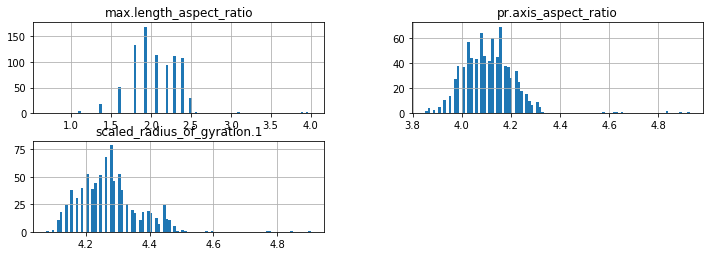

In [98]:
vehicles_df[skew_columns].hist(stacked=False , bins=100,figsize=(12,30), layout=(14,2))

In [99]:

vehicles_df[skew_columns].skew()

pr.axis_aspect_ratio           1.811396
max.length_aspect_ratio        1.225125
scaled_radius_of_gyration.1    1.177227
dtype: float64

In [100]:
#skewness post transformation
vehicles_df.skew()

compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.396381
pr.axis_aspect_ratio           1.811396
max.length_aspect_ratio        1.225125
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.652753
scaled_variance.1              0.843027
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    1.177227
skewness_about                 0.779277
skewness_about.1               0.688423
hollows_ratio                 -0.226341
dtype: float64

In [102]:
#3.Split the data into train and test
from sklearn.model_selection import train_test_split,KFold,cross_val_score
y_features= vehicles_df['class']
vehicles_target_df= vehicles_df.drop('class',axis=1)
x_train,x_test,y_train,y_test =train_test_split(vehicles_target_df,y_features,test_size=0.30, random_state=42)

In [104]:
print("Training data size :",x_train.shape)
print("Testing data size :",x_test.shape)

Training data size : (592, 17)
Testing data size : (254, 17)


In [105]:
#4.Train a Support vector machine using the train set and get the accuracy on the test set
from sklearn.svm import LinearSVC,SVC
from  sklearn import metrics 
svcModel = SVC(kernel='linear')
svcModel.fit(x_train,y_train)
svc_predict_train=svcModel.predict(x_train)
#model accuracy 
print("Performance accuracy for model on training data set :",metrics.accuracy_score(y_train, svc_predict_train))
svc_predict=svcModel.predict(x_test)

print("Performance accuracy for model on testing data set :",metrics.accuracy_score(y_test, svc_predict))

Performance accuracy for model on training data set : 0.9206081081081081
Performance accuracy for model on testing data set : 0.8661417322834646


In [106]:
#5.Perform K-fold cross validation and get the cross validation score of the model
cv=KFold(n_splits=10, random_state=None, shuffle=False)
#training data score
scores = cross_val_score(svcModel, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#testing data score
scores_test=cross_val_score(svcModel, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

In [107]:
print("Training dataset score after K-Fold validation :",np.mean(scores))
print("testing dataset score after K-Fold validation :",np.mean(scores_test))

Training dataset score after K-Fold validation : 0.8985593220338984
testing dataset score after K-Fold validation : 0.8418461538461539


In [108]:
#6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data
#step 1: Scale the data
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

vehicle_df_scaled = scaler_x.fit_transform(vehicles_target_df)

vehicles_scaled_features=pd.DataFrame(vehicle_df_scaled,index=vehicles_target_df.index,columns=vehicles_target_df.columns)
vehicles_scaled_features

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.448979,0.669362,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.307293,-0.074340,0.380665,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.648009,0.352541,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.014385,0.537873,0.156589,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.667942,0.669362,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.129032,1.558230,-0.403603,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.250366,0.352541,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.402784,-0.074340,-0.291565,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,4.663043,5.626910,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,5.886443,0.537873,-0.179527,-1.699181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.082445,-0.950811,0.310811,0.422750,0.391728,-0.001635,0.002961,-0.119602,-0.225160,-0.964965,0.362799,-0.099199,-0.790412,-0.014385,0.129731,1.389011,-0.085062
842,-0.568495,0.191055,0.120112,-0.176389,0.667942,0.955961,-0.298466,0.264671,-0.225160,0.758332,-0.498811,-0.405402,0.039668,-0.014385,-1.094696,0.828819,0.183957
843,1.497218,1.496044,1.200739,1.591071,0.802926,1.217606,1.600522,-1.400514,1.707733,1.723379,1.256322,1.596260,0.777517,-0.307293,-0.686554,-0.963795,0.721997
844,-0.933032,-1.440183,-0.261286,-0.685658,-0.491896,-0.403167,-1.021890,1.161309,-0.998318,-1.654284,-1.073218,-0.961105,-0.821156,-0.919090,-1.298768,1.389011,-0.085062


In [109]:
#Step 2: calculate covariance matrix

covariance_mat = np.cov(vehicles_scaled_features,rowvar=False)
print(covariance_mat)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.1190298   0.32215538
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25386963  0.23596607  0.15757316  0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.17086098  0.42307267
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.06625924  0.14456452 -0.01186527  0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.19056198  0.50022599
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.22452577  0.1139479   0.26586756  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.69161691  0.50589902
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.21323943  0.04877731  0.17403799  0.47181974]
 [ 0.1190298   0.17086098  0.19056198  0.69161691  1.00118343  0.42602387
   0.1277201  -0.21962479  0.10012483  0.13642888  0.26594211  0.11174105
   0.130

In [110]:
#Calculation of eigen vectors and values
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(vehicle_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [111]:
#Eigen Values
print(pca.explained_variance_)

[9.53933439 2.34444687 1.43557502 1.17238255 0.85153214 0.71883245
 0.3616939  0.21782808 0.09241106 0.09173731]


In [112]:
#Eigen vectors
print(pca.components_)

[[ 2.72581486e-01  2.92113103e-01  3.03558749e-01  2.65200758e-01
   8.66481663e-02  1.54328700e-01  3.14099137e-01 -3.11523799e-01
   3.11186773e-01  2.82397394e-01  3.05831885e-01  3.10999252e-01
   2.70023042e-01 -2.23761914e-02  4.07767126e-02  5.80559506e-02
   7.46576986e-02]
 [-1.07292109e-01  1.45765330e-01 -9.13777591e-02 -2.44685923e-01
  -2.65936031e-01 -1.91996541e-01  7.15564242e-02 -1.47774233e-03
   8.53871964e-02  1.25376010e-01  7.43737396e-02  8.41620651e-02
   2.48194515e-01  5.39015112e-01 -3.36911495e-02 -1.77016612e-01
  -6.05045469e-01]
 [-1.96629379e-01  5.22070994e-02 -8.76092021e-02  2.60951650e-01
   6.56567680e-01  3.98194841e-01 -1.07762013e-01  5.54827312e-02
  -1.23614936e-01  5.28970703e-02  3.96020065e-02 -1.22828225e-01
   6.08461637e-02  3.30354078e-01 -2.17730765e-01 -2.78120682e-01
  -7.86207317e-02]
 [ 9.89516238e-02  1.77670311e-01 -3.98392308e-02 -7.63925678e-02
  -3.75015926e-02  9.85901978e-02 -9.87105165e-02  9.19614018e-02
  -9.19127849e-02  

In [113]:
#variance explained by each principal component
pca.explained_variance_ratio_

array([0.56047403, 0.13774563, 0.08434577, 0.06888216, 0.05003092,
       0.04223428, 0.02125096, 0.01279827, 0.00542952, 0.00538993])

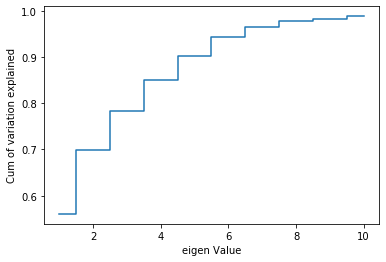

In [114]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [116]:
np.cumsum(pca.explained_variance_ratio_)

array([0.56047403, 0.69821966, 0.78256543, 0.8514476 , 0.90147851,
       0.94371279, 0.96496376, 0.97776203, 0.98319155, 0.98858148])

In [146]:
#the data shows variance over 95% when it has about 7 components
PCA7 = PCA(n_components=7)

In [50]:
#7.Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.

In [147]:
#Split prinicpal components  train and test set
x_train_scaled ,x_test_scaled,y_train_scaled,y_test_scaled =train_test_split(vehicles_scaled_features,y_features,test_size=0.30, random_state=42)

In [148]:
#fit and transform prinicipal components 
x_train_scaled = PCA7.fit_transform(x_train_scaled) 
x_test_scaled = PCA7.transform(x_test_scaled) 

In [150]:
#Train a SVM for the Principal components
svcModel_PC = SVC(kernel='linear')
svcModel_PC.fit(x_train_scaled,y_train_scaled)
svc_predict_train_PC=svcModel_PC.predict(x_train_scaled)
#model accuracy 
print("Performance accuracy for model on training data set :",metrics.accuracy_score(y_train_scaled, svc_predict_train_PC))

svc_predict_PC=svcModel_PC.predict(x_test_scaled)
print("Performance accuracy for model on testing data set :",metrics.accuracy_score(y_test_scaled, svc_predict_PC))

Performance accuracy for model on training data set : 0.8074324324324325
Performance accuracy for model on testing data set : 0.8503937007874016


In [125]:
svc_predict_PC

array(['bus', 'van', 'bus', 'car', 'bus', 'van', 'van', 'car', 'car',
       'car', 'car', 'bus', 'bus', 'car', 'car', 'van', 'bus', 'bus',
       'car', 'car', 'van', 'van', 'car', 'bus', 'car', 'bus', 'car',
       'van', 'van', 'van', 'car', 'van', 'bus', 'van', 'van', 'car',
       'bus', 'car', 'bus', 'car', 'van', 'bus', 'car', 'van', 'car',
       'car', 'bus', 'van', 'bus', 'van', 'bus', 'bus', 'van', 'van',
       'bus', 'car', 'car', 'car', 'bus', 'car', 'bus', 'van', 'car',
       'bus', 'van', 'bus', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'bus',
       'van', 'bus', 'car', 'car', 'car', 'van', 'bus', 'van', 'car',
       'car', 'car', 'bus', 'car', 'car', 'bus', 'van', 'van', 'car',
       'car', 'car', 'car', 'car', 'car', 'bus', 'bus', 'car', 'bus',
       'car', 'car', 'van', 'bus', 'van', 'car', 'bus', 'van', 'bus',
       'car', 'bus', 'car', 'bus', 'car', 'car', 'van', 'bus', 'bus',
       'bus', 'van',

In [151]:
#5.Perform K-fold cross validation and get the cross validation score of the model
cv_PC=KFold(n_splits=10, random_state=None, shuffle=False)
#training data score
scores_PC = cross_val_score(svcModel_PC, x_train_scaled, y_train_scaled, scoring='accuracy', cv=cv_PC, n_jobs=-1)
#testing data score
scores_test_PC=cross_val_score(svcModel_PC, x_test_scaled, y_test_scaled, scoring='accuracy', cv=cv_PC, n_jobs=-1)
scores_PC

array([0.85      , 0.75      , 0.74576271, 0.76271186, 0.76271186,
       0.76271186, 0.83050847, 0.79661017, 0.91525424, 0.79661017])

In [152]:
print("Training dataset score after K-Fold validation :",np.mean(scores_PC))
print("testing dataset score after K-Fold validation :",np.mean(scores_test_PC))

Training dataset score after K-Fold validation : 0.7972881355932204
testing dataset score after K-Fold validation : 0.8387692307692308


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0 bus
1 car
2 van


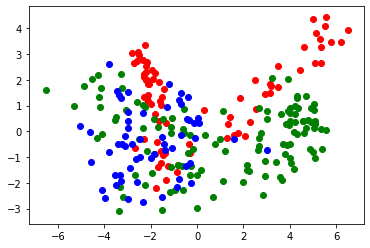

In [144]:
#Plot scatterplot for the clusters formed
from matplotlib.colors import ListedColormap 

for i, j in enumerate(np.unique(y_test_scaled)): 
    print(i,j)
    plt.scatter(x_test_scaled[y_test_scaled == j, 0], x_test_scaled[y_test_scaled == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
    
    
    

    



In [153]:
pd.value_counts(svc_predict_PC)

car    112
bus     80
van     62
dtype: int64

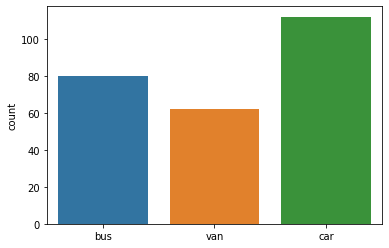

In [154]:
sns.countplot(svc_predict_PC)

In [155]:
print("Classification report for raw data without kfold without PC:\n", metrics.classification_report(y_test,svc_predict))

Classification report for raw data without kfold without PC:
               precision    recall  f1-score   support

         bus       0.79      0.91      0.85        78
         car       0.93      0.81      0.87       118
         van       0.87      0.91      0.89        58

    accuracy                           0.87       254
   macro avg       0.86      0.88      0.87       254
weighted avg       0.87      0.87      0.87       254



In [156]:
print("Classification report for PC without kfold for PC:\n", metrics.classification_report(y_test_scaled,svc_predict_PC))

Classification report for PC without kfold for PC:
               precision    recall  f1-score   support

         bus       0.79      0.81      0.80        78
         car       0.89      0.85      0.87       118
         van       0.85      0.91      0.88        58

    accuracy                           0.85       254
   macro avg       0.85      0.86      0.85       254
weighted avg       0.85      0.85      0.85       254



# Summary

| Accuracy /Data | Accuracy score (TrainingSet)|Accuracy score (TestingSet) |Cross-validation score (TrainingSet ) |Cross-validation score (TestingSet ) |
|:---:|:-------------|:-----------|:------|:------|
| RAW DATA|0.92|0.87|0.90|0.84|
| PCA|0.81|0.85|0.80|0.84|



From the results above:
1. If we compare row 1 values for accuracy of model on raw data ,Cross validation has reduced the overfitting problem a bit. But when the principal components have been taken , the overfitting of model has been resolved. The accuracy scores in this case on both  training set and testing accuracy scores are close .
2. If we compare testing set accuracy score for raw data and Prinicpal components (0.87 and 0.85), even though the dimensions have been reduced from 17 to 7, the accuracy score is quite unaffected. This is similar in case of cross-validation score as well.

Hence we can observe that, if we choose correct number of dimensions , where we can cover maximum  variance (95% in this case) by the components (7 in this case),PCA can help in reducing number of dimensions without loss of much information.
